In [2]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
from pylab import rcParams
rcParams['figure.figsize'] = 15, 10
plt.rc('svg', fonttype = 'svgfont')

In [3]:
import sys
import platform
import matplotlib
print("Operating System " + platform.system() + " " + platform.release())
print("Python Version " + str(sys.version))
print("Pandas Version " + str(pd.__version__))
print("Numpy Version " + str(np.__version__))
print("Matplotlib Version " + str(matplotlib.__version__))

Operating System Windows 7
Python Version 2.7.8 (default, Jun 30 2014, 16:03:49) [MSC v.1500 32 bit (Intel)]
Pandas Version 0.17.0
Numpy Version 1.9.3
Matplotlib Version 1.4.3


In [67]:
savePlace = 'E:/GSL/'
#savePlace = '/media/p/Transcend/GSL/'

In [4]:
#filepath = '/media/p/Transcend/GitHub/Great_Salt_Lake_Brine_Chemistry_Database.xlsx'
filepath = 'E:/GitHub/Great_Salt_Lake_Brine_Chemistry_Database.xlsx'
xl = pd.ExcelFile(filepath)
sheetList = xl.sheet_names  # see all sheet names

In [5]:
f = {}
for sheet in sheetList[4:]:
    f[sheet] = pd.read_excel(filepath,sheet,na_values=['nd','n/a','*Densities for this set were measured using a hydrometer on AS2 5, AS2 15, and AS2 23. The other densities were estimated from these measurements.'])

In [6]:
g = pd.concat(f)

In [7]:
old_names = [u'SITE', u'DATE', u'DEPTH-FT', u'FIELD-DEN\n(g/cm3)', u'LAB-DEN\n(g/cm3)', 
             u'TEMP-°F', u'Na+ \n(g/L)', u'Mg+2 \n(g/L)', u'K+ \n(g/L)', u'Ca+2 \n(g/L)', u'Cl- \n(g/L)', 
             u'SO4-2 \n(g/L)', u'Br \n(ppm)', u'Li \n(ppm)', u'B \n(ppm)', u'TDS \n(g/L)', u'WT%-TDS', 
             u'Lab TDS (g/L)', u'Lab WT%-TDS', u'LK-ELEV\n(feet)', u'SAMP-ELEV\n(feet)', u'WT%-Na', 
             u'WT%-Mg', u'WT%-K', u'WT%-Ca', u'WT%-Cl', u'WT%-SO4', u'Lab', u'Cation/Anion Ratio']
new_names = ['site', 'date', 'depth_ft', 'fieldDensity_gcm3', 'labDensity_gcm3','tempF','Na_gL','Mg_gL',
            'K_gL','Ca_gL','Cl_gL','SO4_gL','Br_ppm','Li_ppm','B_ppm','TDS_gL','WT_TDS','LabTDS_gL',
            'LabWT_TDS','LK_Elev_ft','SampElev_ft','WT_Na','WT_Mg','WT_K','WT_Ca','WT_Cl','WT_SO4','Lab',
            'CationAnionRatio']
g.rename(columns=dict(zip(old_names, new_names)), inplace=True)
columnKey = pd.DataFrame(dict(zip(old_names, new_names)))

In [101]:
descript = pd.read_excel(filepath,'Explanation',skipfooter=11,skiprows=3,na_values=['nd','n/a'])

In [76]:
columnKey = pd.DataFrame.from_dict(dict(zip(old_names, new_names)),orient='index',)

In [83]:
columnKey.reset_index(inplace=True)

In [93]:
columnKey['Field'] = columnKey['index'].apply(lambda x: (x).split('\n')[0].strip(),1)

def columnUnits(x):
    try:
        return (x).split('\n')[1].strip()
    except:
        pass
    
columnKey['Units'] = columnKey['index'].apply(lambda x: columnUnits(x) ,1)
columnKey['Abbreviation'] = columnKey.iloc[:,1]

In [100]:
columnKey.drop(columnKey.columns[0:2], axis=1,inplace=True)

In [102]:
columnKey

,Field,Units,Abbreviation
0,WT%-K,None,WT_K
1,Cation/Anion Ratio,None,CationAnionRatio
2,Lab,None,Lab
3,FIELD-DEN,(g/cm3),fieldDensity_gcm3
4,DATE,None,date
5,LK-ELEV,(feet),LK_Elev_ft
6,Lab TDS (g/L),None,LabTDS_gL
7,WT%-Na,None,WT_Na
8,TEMP-°F,None,tempF
9,Na+,(g/L),Na_gL


In [103]:
columnKey = pd.merge(columnKey,descript,on='Field' )

In [48]:
g.reset_index(inplace=True)

In [43]:
g['site'] = g['level_0']
g['siteLine'] = g['level_1']
g.drop(['level_0','level_1'],inplace=True, axis=1)

In [9]:
g.dropna(subset=['depth_ft', 'date'],inplace=True, axis=0)

In [10]:
sites = pd.read_excel(filepath,'Sample Coordinates',skiprows=4,na_values=['nd','n/a'])
oldCols = sites.columns
newCols = ['site','Long_N27','Lat_N27','Long_N83','Lat_N83','UTME_N83','UTMN_N83']
sites.rename(columns=dict(zip(oldCols, newCols)), inplace=True)

In [20]:
d = {'Ca':0.04990269, 'Mg':0.082287595, 'Na':0.043497608, 'K':0.02557656, 'Cl':0.028206596, 
     'HCO3':0.016388838, 'CO3':0.033328223, 'SO4':0.020833333, 'NO2':0.021736513, 'NO3':0.016129032}
parList = ['Ca','Mg','Na','K','Cl','HCO3','SO4']

def anions(x):
    anion = (x[0]*d['Cl'] + x[1]*d['SO4']) 
    return anion

def cations(x):
    cation = (x[0]*d['Na']  + x[1]*d['Mg'] + x[2]*d['K'] + x[3]*d['Ca'])
    return cation

def chrgbal(x):
    cation = (x[0]*d['Na']  + x[1]*d['Mg'] + x[2]*d['K'] + x[3]*d['Ca'])
    anion = (x[4]*d['Cl'] + x[5]*d['SO4']) 
    return  (cation - anion)/(cation+anion)*100

def calcTDS(x):
    total = x[0] + x[1] + x[2] + x[3] + x[4] + x[5]
    return total

In [22]:
g.columns

Index([u'level_0', u'level_1', u'B_ppm', u'Br_ppm', u'Ca_gL',
       u'CationAnionRatio', u'Cl_gL', u'date', u'depth_ft',
       u'fieldDensity_gcm3', u'K_gL', u'labDensity_gcm3', u'LK_Elev_ft',
       u'Lab', u'LabTDS_gL', u'LabWT_TDS', u'Li_ppm', u'Mg_gL', u'Na_gL',
       u'SampElev_ft', u'site', u'SO4_gL', u'TDS_gL', u'tempF', u'Unnamed: 3',
       u'Unnamed: 30', u'WT_Ca', u'WT_Cl', u'WT_K', u'WT_Mg', u'WT_Na',
       u'WT_SO4', u'WT_TDS', u'chrgBal', u'anion', u'cation', u'ratio',
       u'TDScalc'],
      dtype='object')

In [17]:
g['chrgBal'] = g[['Na_gL','Mg_gL','K_gL','Ca_gL','Cl_gL','SO4_gL']].apply(lambda x: chrgbal(x),1)
g['anion'] = g[['Cl_gL','SO4_gL']].apply(lambda x: anions(x),1)
g['cation'] = g[['Na_gL','Mg_gL','K_gL','Ca_gL']].apply(lambda x: cations(x),1)
g['ratio'] = g[['anion','cation']].apply(lambda x: x[1]/x[0],1)

In [21]:
g['TDScalc'] = g[['Na_gL','Mg_gL','K_gL','Ca_gL','Cl_gL','SO4_gL']].apply(lambda x: calcTDS(x),1)

In [23]:
def wtPecTDS(x):
    return x[1]/x[0]/10


g['WT_TDS_calc'] = g[['labDensity_gcm3','TDScalc']].apply(lambda x: wtPecTDS(x),1)

In [18]:
g[(g['chrgBal'].notnull())&(g.site=='AS2')]

,level_0,level_1,B_ppm,Br_ppm,Ca_gL,CationAnionRatio,Cl_gL,date,depth_ft,fieldDensity_gcm3,...,WT_Cl,WT_K,WT_Mg,WT_Na,WT_SO4,WT_TDS,chrgBal,anion,cation,ratio
10198,AS2,0,NaN,101,0.450,1.188679,117.40,1966-06-27,0.5,NaN,...,51.141314,2.613696,3.528489,35.241331,7.475170,19.961739,8.622871,3.668954,4.361402,1.188731
10199,AS2,1,NaN,67,0.450,1.156530,119.11,1966-06-27,3,NaN,...,51.906567,2.222513,3.529873,34.862945,7.478102,20.128947,7.260685,3.717188,4.299235,1.156583
10200,AS2,2,NaN,61,0.450,1.041404,117.40,1966-06-27,7,NaN,...,54.371990,2.315672,3.982957,31.493146,7.836236,18.940351,2.030739,3.663954,3.815850,1.041457
10201,AS2,3,NaN,67,0.450,1.133947,123.36,1966-06-27,11,NaN,...,52.583120,2.131287,3.495311,34.526854,7.263427,20.578947,6.279357,3.834566,4.348404,1.134002
10202,AS2,4,NaN,76,0.450,0.997940,116.55,1966-06-27,15,NaN,...,55.072532,2.362614,3.780182,30.713982,8.070689,18.564035,-0.100666,3.643312,3.635984,0.997989
10203,AS2,5,NaN,65,0.700,1.133367,119.11,1966-06-27,19,NaN,...,52.284799,2.238708,3.818972,33.800097,7.857425,19.983333,6.253595,3.732604,4.230590,1.133415
10204,AS2,6,NaN,82,0.500,0.899767,159.09,1966-06-27,23,NaN,...,57.160822,2.515091,3.628916,28.384593,8.310578,24.414035,-5.273562,4.969262,4.471403,0.899812
10206,AS2,8,NaN,95,0.360,1.056710,130.88,1966-07-29,0.5,NaN,...,53.966683,2.391555,3.257463,32.986970,7.397328,20.997403,2.759757,4.065429,4.296190,1.056762
10207,AS2,9,NaN,90,0.300,1.079805,132.62,1966-07-29,3,NaN,...,53.668407,2.318805,3.399296,33.385941,7.227550,21.413345,3.839674,4.112842,4.441293,1.079860
10208,AS2,10,NaN,92,0.400,1.021851,128.26,1966-07-29,7,NaN,...,54.802598,2.106478,3.460947,32.045804,7.584174,20.475941,1.083216,3.987570,4.074904,1.021902


In [25]:
# compare calculated ion ratios; returns percentage
g['ratioDiff'] = (g.ratio - g.CationAnionRatio)/(g.ratio + g.CationAnionRatio)

In [35]:
# select ratios with differences greater than a threshold
g[(g['ratioDiff'].notnull())&(g.ratioDiff > 0.00005)]

,level_0,level_1,B_ppm,Br_ppm,Ca_gL,CationAnionRatio,Cl_gL,date,depth_ft,fieldDensity_gcm3,...,WT_Na,WT_SO4,WT_TDS,chrgBal,anion,cation,ratio,TDScalc,WT_TDS_calc,ratioDiff
9187,AC3,258,54,113,0.16,1.189429,276.38,1972-01-29,26.1,1.166,...,15.134679,4.107032,39.470175,8.661196,8.180739,9.732215,1.189650,450.12,39.484211,0.000093
10402,AS2,204,27,79,0.14,0.866287,144.02,1970-07-29,20,NaN,...,22.804090,6.498952,20.794484,-7.159486,4.378772,3.793668,0.866377,233.87,20.806940,0.000052


In [36]:
g['TDS_WT_perc_Diff'] = (g.WT_TDS_calc - g.WT_TDS)/(g.WT_TDS_calc + g.WT_TDS)

In [72]:
# select ratios with differences greater than a threshold
TDSwtPercDiff = g[(g['TDS_WT_perc_Diff'].notnull())&(g['TDS_WT_perc_Diff'] > 0.005)]

In [52]:
g['month'] = g['date'].dt.month
g['year'] = g['date'].dt.year

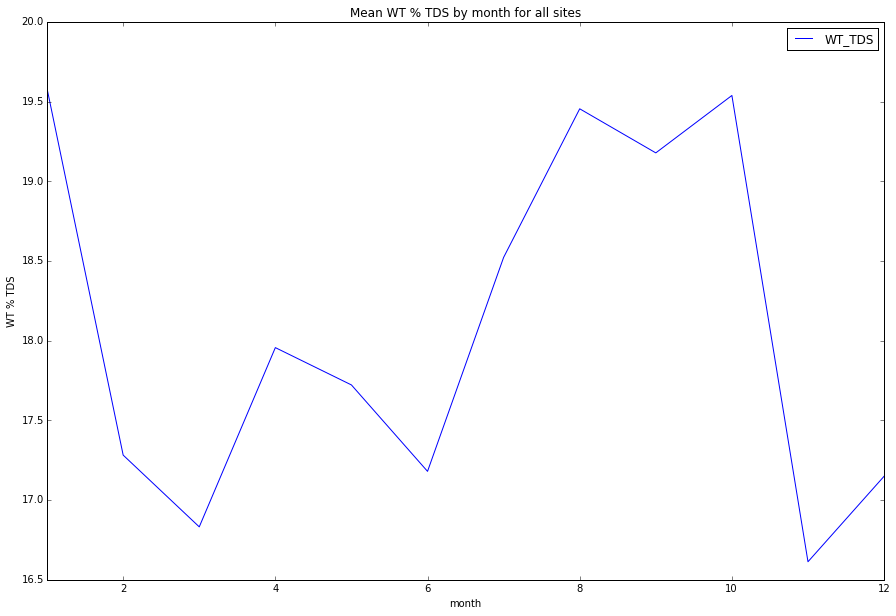

In [68]:
plt.figure()
g.groupby(['month'])['WT_TDS'].mean().to_frame().plot()
plt.ylabel('WT % TDS')
plt.title('Mean WT % TDS by month for all sites')
plt.savefig(savePlace + 'WTTDSbyMonth.pdf')

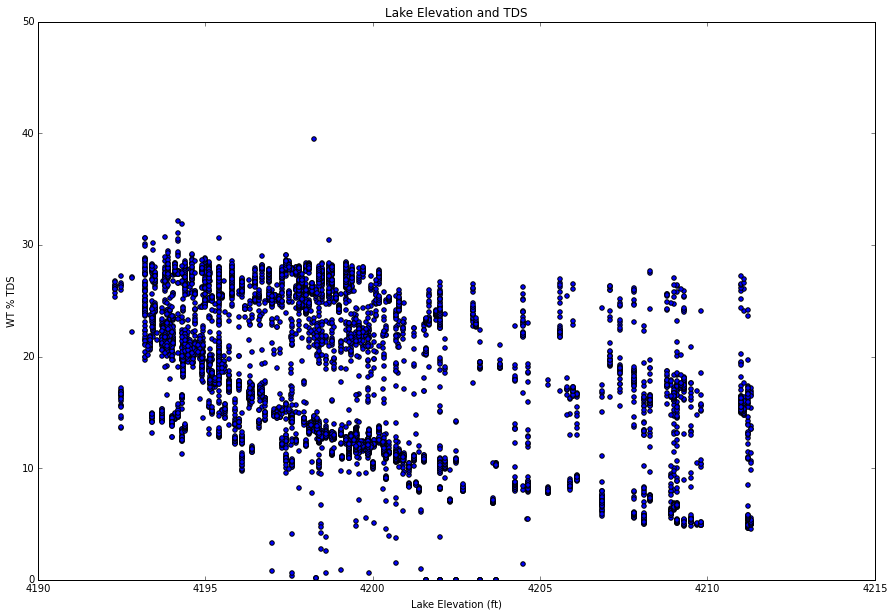

In [69]:
x = g.LK_Elev_ft
y = g.WT_TDS


plt.figure()
plt.scatter(x,y)
plt.ylim(0,50)
plt.xlabel('Lake Elevation (ft)')
plt.ylabel(u'WT % TDS')
plt.title('Lake Elevation and TDS')
plt.savefig(savePlace + 'ElevTDS.pdf')

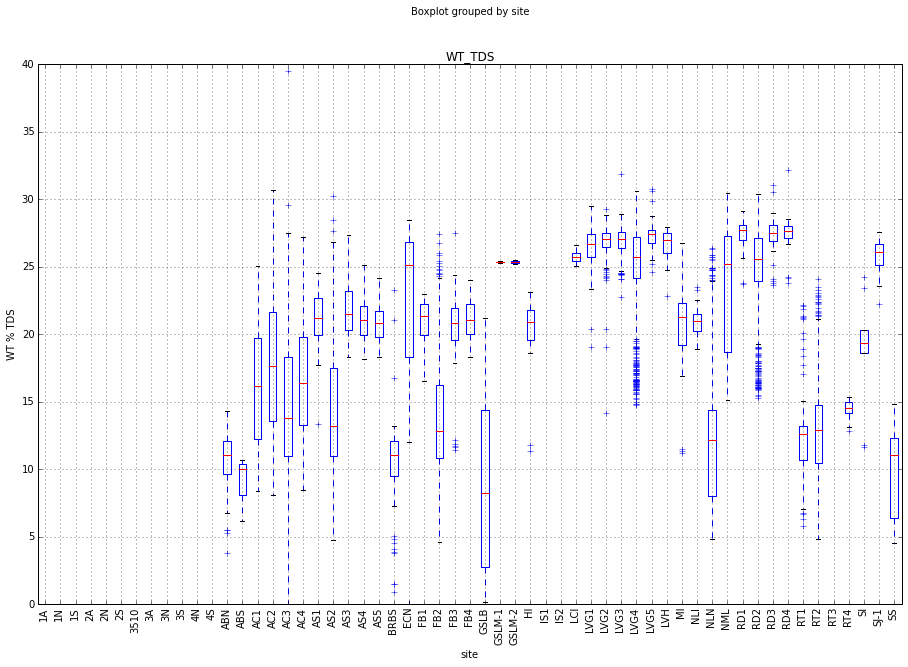

In [70]:
plt.figure()
g.boxplot(column='WT_TDS',by='site', rot=90)
plt.ylabel('WT % TDS')
plt.savefig(savePlace + 'WT_TDS_boxplot.pdf')

In [71]:
g.columns

Index([u'level_0', u'index', u'B_ppm', u'Br_ppm', u'Ca_gL',
       u'CationAnionRatio', u'Cl_gL', u'date', u'depth_ft',
       u'fieldDensity_gcm3', u'K_gL', u'labDensity_gcm3', u'LK_Elev_ft',
       u'Lab', u'LabTDS_gL', u'LabWT_TDS', u'Li_ppm', u'Mg_gL', u'Na_gL',
       u'SampElev_ft', u'site', u'SO4_gL', u'TDS_gL', u'tempF', u'Unnamed: 3',
       u'Unnamed: 30', u'WT_Ca', u'WT_Cl', u'WT_K', u'WT_Mg', u'WT_Na',
       u'WT_SO4', u'WT_TDS', u'chrgBal', u'anion', u'cation', u'ratio',
       u'TDScalc', u'WT_TDS_calc', u'ratioDiff', u'TDS_WT_perc_Diff',
       u'siteLine', u'month', u'year'],
      dtype='object')

In [128]:
g.groupby('site')['Cl_gL'].agg({'min':np.min, 'mean':np.mean,
                               'range':(lambda x: np.max(x)-np.min(x)),'median':np.median, 
                                  'max':np.max, 'std':np.std, 'cnt':(lambda x: np.count_nonzero(~np.isnan(x)))}).reset_index()

,site,std,cnt,min,max,median,range,mean
0,1A,NaN,0,NaN,NaN,NaN,NaN,NaN
1,1N,NaN,0,NaN,NaN,NaN,NaN,NaN
2,1S,NaN,0,NaN,NaN,NaN,NaN,NaN
3,2A,NaN,0,NaN,NaN,NaN,NaN,NaN
4,2N,NaN,0,NaN,NaN,NaN,NaN,NaN
5,2S,NaN,0,NaN,NaN,NaN,NaN,NaN
6,3510,NaN,0,NaN,NaN,NaN,NaN,NaN
7,3A,NaN,0,NaN,NaN,NaN,NaN,NaN
8,3N,NaN,0,NaN,NaN,NaN,NaN,NaN
9,3S,NaN,0,NaN,NaN,NaN,NaN,NaN


In [113]:
SummaryStatsAll = g.describe(percentiles=[0.05,0.25,0.5,0.75,0.95])

In [ ]:
SummaryStatsAll.drop([u'level_0', u'index', u'CationAnionRatio', u'chrgBal', u'anion', u'cation', 
                      u'ratio', u'ratioDiff', u'TDS_WT_perc_Diff', u'siteLine', u'month', u'year'], inplace=True, axis=1)

In [122]:
SummaryStatsAll

,B_ppm,Br_ppm,Ca_gL,Cl_gL,fieldDensity_gcm3,K_gL,labDensity_gcm3,LK_Elev_ft,LabTDS_gL,LabWT_TDS,...,tempF,WT_Ca,WT_Cl,WT_K,WT_Mg,WT_Na,WT_SO4,WT_TDS,TDScalc,WT_TDS_calc
count,4010.000000,5045.000000,7418.000000,7419.000000,15578.000000,7418.000000,14833.000000,25454.000000,139.000000,139.000000,...,6322.000000,7418.000000,7418.000000,7418.000000,7418.000000,7418.000000,7418.000000,7452.000000,7417.000000,7407.000000
mean,31.379052,90.820218,0.304856,118.211022,1.129601,5.010709,1.112580,4204.211084,205.478417,17.794608,...,59.179579,0.166062,55.787536,2.760228,3.052733,31.193793,7.165739,18.150211,212.079187,18.251290
std,17.688259,43.039066,0.115123,49.994603,0.062374,2.673307,0.074903,5.350099,78.450331,5.862655,...,15.228374,0.085786,1.603183,1.152865,0.733505,1.785733,0.990401,7.049756,89.312520,6.967150
min,0.000000,0.000000,0.010000,0.040000,0.998000,0.030000,1.000000,4192.300000,133.000000,12.213039,...,0.000000,0.000000,15.610329,0.893165,0.820793,9.047340,1.946401,0.000000,1.320000,0.132000
5%,10.000000,27.000000,0.140000,38.055000,1.037000,1.350000,1.037800,4194.700000,137.900000,12.560779,...,34.000000,0.066467,53.661385,1.792115,2.017601,28.070147,5.653159,6.043705,68.122000,6.497326
25%,19.000000,60.000000,0.230000,74.900000,1.080000,3.000000,1.067000,4199.500000,157.000000,14.176075,...,46.000000,0.111880,55.056222,2.108378,2.431433,30.381403,6.593797,12.392161,136.140000,12.450324
50%,28.000000,89.000000,0.290000,114.430000,1.130300,4.500000,1.100000,4206.000000,164.000000,14.658273,...,62.000000,0.152378,55.782715,2.602745,3.081708,31.500540,7.190377,17.982743,206.380000,18.091463
75%,39.000000,113.000000,0.370000,169.270000,1.173000,6.800000,1.147000,4208.800000,294.500000,24.080131,...,72.000000,0.211473,56.524476,3.360884,3.514844,32.236329,7.696964,25.090038,302.990000,25.122511
95%,66.000000,163.000000,0.520000,188.410000,1.222000,9.500000,1.218000,4211.200000,356.200000,29.077551,...,80.200000,0.291454,58.020986,3.926280,4.214153,33.417358,8.676789,27.765045,338.160000,27.796217
max,314.000000,840.000000,0.910000,276.380000,2.220800,74.000000,7.076000,4211.600000,375.000000,30.612245,...,95.000000,2.325581,69.256099,72.378717,8.541168,48.809934,17.565090,39.470175,450.120000,39.484211


In [141]:
TDS_Pls_2SD = SummaryStatsAll.loc['mean','LabTDS_gL'] + SummaryStatsAll.loc['std','LabTDS_gL']*2.0
TDS_Min_2SD = SummaryStatsAll.loc['mean','LabTDS_gL'] - SummaryStatsAll.loc['std','LabTDS_gL']*2.0
print(TDS_Pls_2SD)
print(TDS_Min_2SD)
LabTDS_SD = g[(g['LabTDS_gL']>TDS_Pls_2SD)|(g['LabTDS_gL']>TDS_Min_2SD)]

362.379079576
48.577754956


In [142]:
chemList = [u'Ca_gL',u'K_gL', u'LabTDS_gL', u'LabWT_TDS', u'Li_ppm', u'Mg_gL', u'Na_gL', u'SO4_gL', u'TDS_gL', u'tempF']

chem = {}
for i in chemList:
    chem['Stats_'+ i] = g.groupby('site')[i].agg({'min':np.min, 'mean':np.mean,
                               'range':(lambda x: np.max(x)-np.min(x)),'median':np.median, 
                                  'max':np.max, 'std':np.std, 'cnt':(lambda x: np.count_nonzero(~np.isnan(x)))}).reset_index()
SummaryStatsBySite = pd.concat(chem)

In [143]:
chem = {}
for i in chemList:
    chem['Stats_'+ i] = g.groupby('month')[i].agg({'min':np.min, 'mean':np.mean,
                               'range':(lambda x: np.max(x)-np.min(x)),'median':np.median, 
                                  'max':np.max, 'std':np.std, 'cnt':(lambda x: np.count_nonzero(~np.isnan(x)))}).reset_index()
SummaryStatsByMonth = pd.concat(chem)

In [24]:
g.to_csv('E:/Brines.csv')

In [144]:
writer = pd.ExcelWriter(savePlace + "combined_out.xlsx", engine="xlsxwriter")
g.to_excel(writer, "results", index=False)
sites.to_excel(writer, "stations", index=False)
TDSwtPercDiff.to_excel(writer, 'TDS_WT_perc_differences',index=False)
LabTDS_SD.to_excel(writer, 'LabTDS_beyond_2SD')
columnKey.to_excel(writer, 'Explanation',index=False)
SummaryStatsAll.to_excel(writer,'SummaryStatsAll')
SummaryStatsBySite.to_excel(writer,'SummaryStatsBySite')
SummaryStatsByMonth.to_excel(writer,'SummaryStatsByMonth')
writer.save()